# Hand Gesture Classification System

This notebook demonstrates the end-to-end pipeline for a real-time hand gesture classification system. 
The pipeline includes:
1. **Data Preprocessing**: Normalizing MediaPipe landmarks.
2. **Visualization**: Spot-checking the data.
3. **Model Training**: Comparing Random Forest, SVM, and Logistic Regression.
4. **Evaluation**: Measuring performance with F1-scores and Confusion Matrices.

## 1. Landmark Visualization
Before training, we visualize a few samples to ensure the landmarks are correctly extracted and the skeleton structure is intact.

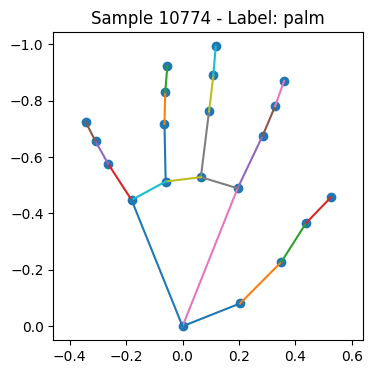

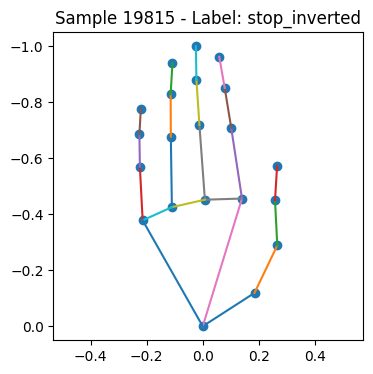

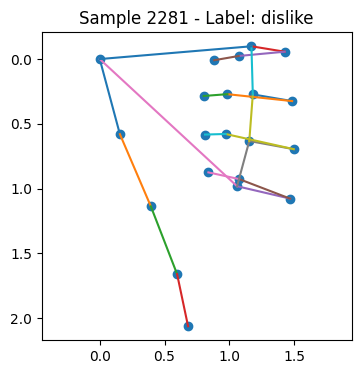

In [24]:
import sys
sys.path.append("./src")

from preprocessing import load_and_split
from visualization import plot_multiple_samples
import pandas as pd

# Load raw (not split yet for visualization)
df = pd.read_csv(r"data\hand_landmarks_data.csv")

from preprocessing import normalize_landmarks
df_norm = normalize_landmarks(df)

plot_multiple_samples(df_norm, n_samples=3)


## 2. Data Loading and Splitting
We load the CSV dataset and split it into training and testing sets. Normalization is applied during loading.

In [25]:
import sys
sys.path.append("./src")  # so Python sees src

from preprocessing import load_and_split

X_train, X_test, y_train, y_test = load_and_split(r"data\hand_landmarks_data.csv")

print(X_train.shape)
print(X_test.shape)
print(y_train.value_counts())

(20540, 63)
(5135, 63)
label
three2             1322
palm               1319
four               1307
ok                 1274
stop_inverted      1253
call               1205
peace_inverted     1198
stop               1186
rock               1166
three              1165
peace              1153
like               1149
two_up_inverted    1097
two_up             1074
dislike            1036
one                1010
mute                870
fist                756
Name: count, dtype: int64


## 3. Model Training
We train three different classifiers using Grid Search to find the best hyperparameters.

In [17]:
import sys
sys.path.append("./src")

from train import train_random_forest, train_svm, train_logistic_regression

# Train models in memory, debug mode for speed
rf_model = train_random_forest(X_train, y_train, debug=False)


INFO:root:Training Random Forest Classifier...


Fitting 3 folds for each of 4 candidates, totalling 12 fits


INFO:root:RF best params: {'criterion': 'gini', 'max_depth': 20, 'n_estimators': 100}


In [18]:
svm_model = train_svm(X_train, y_train, debug=False)


INFO:root:Training SVM...


Fitting 3 folds for each of 4 candidates, totalling 12 fits


INFO:root:SVM best params: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}


In [19]:
lr_model = train_logistic_regression(X_train, y_train, debug=False)

models = {
    'RandomForest': rf_model,
    'SVM': svm_model,
    'LogisticRegression': lr_model
}

INFO:root:Training Logistic Regression...


Fitting 3 folds for each of 2 candidates, totalling 6 fits


C:\Users\Home\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:1135: FutureWarning: 'penalty' was deprecated in version 1.8 and will be removed in 1.10. To avoid this warning, leave 'penalty' set to its default value and use 'l1_ratio' or 'C' instead. Use l1_ratio=0 instead of penalty='l2', l1_ratio=1 instead of penalty='l1', and C=np.inf instead of penalty=None.
  warnings.warn(
INFO:root:LogReg best params: {'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}


## 4. Evaluation
We evaluate the models on the test set and display confusion matrices.

Evaluating RandomForest...


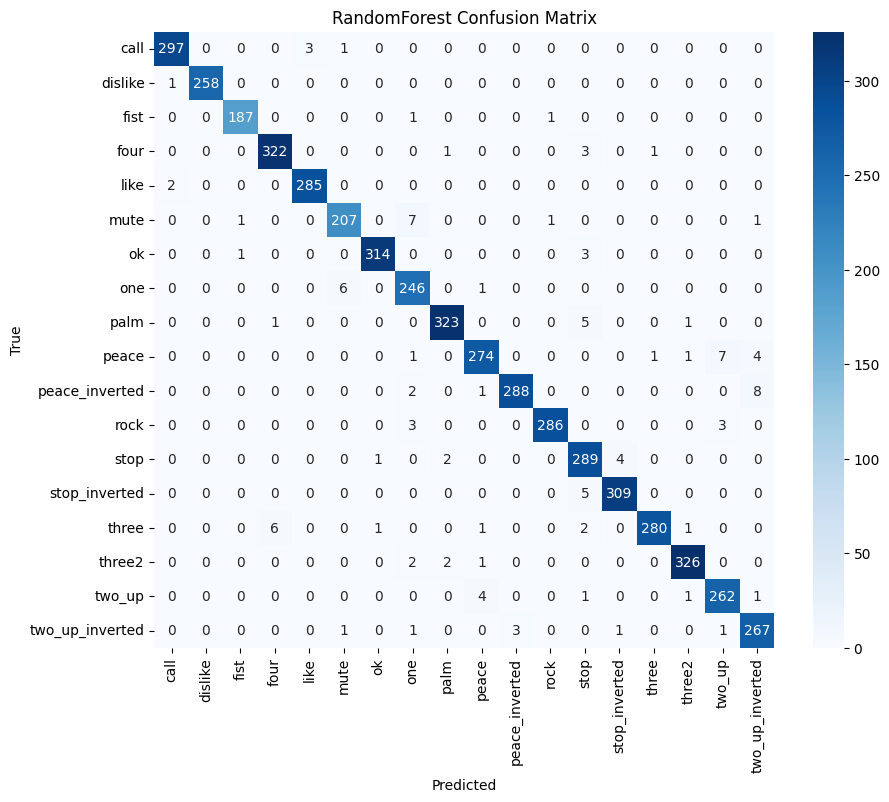

RandomForest metrics: {'accuracy': 0.9776046738072055, 'f1_score': 0.977660950074382, 'auc': 0.9991430243408591, 'precision': 0.977890080551785, 'recall': 0.9776046738072055}

Evaluating SVM...


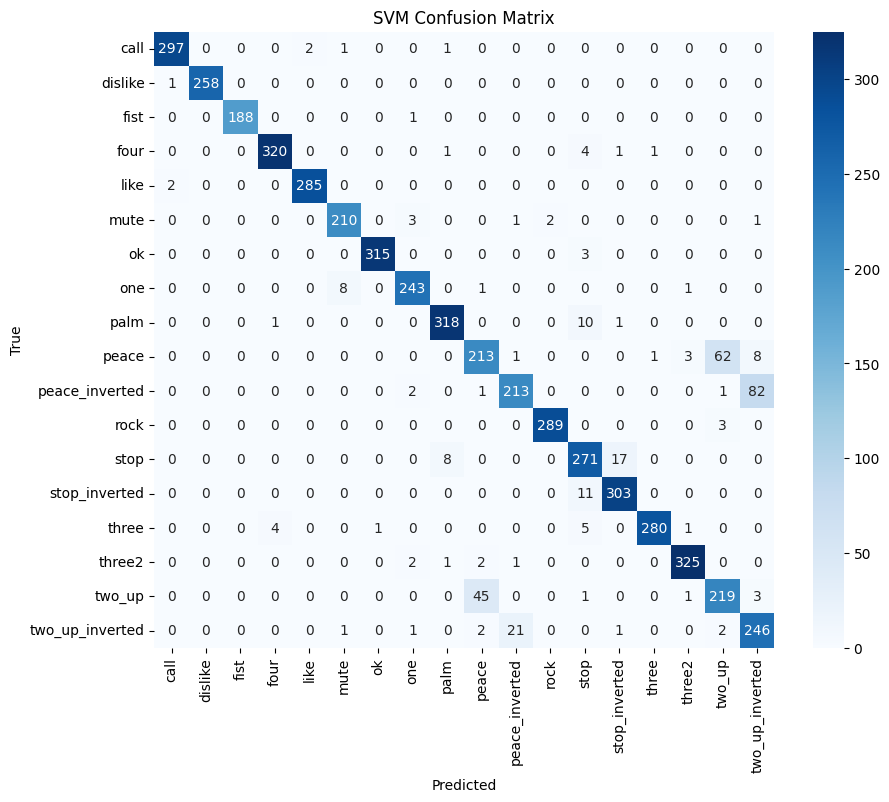

SVM metrics: {'accuracy': 0.9333982473222979, 'f1_score': 0.9333806504100816, 'auc': 0.9972247746076337, 'precision': 0.9359507284290612, 'recall': 0.9333982473222979}

Evaluating LogisticRegression...


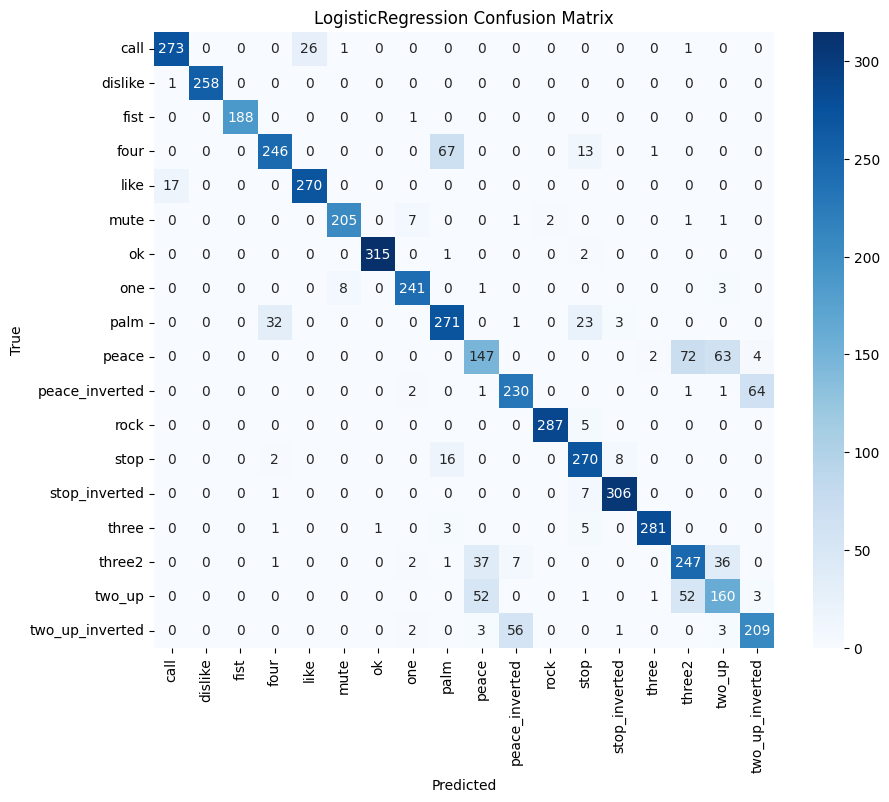

LogisticRegression metrics: {'accuracy': 0.8576436222005842, 'f1_score': 0.8569772337621292, 'auc': 0.9910309425915107, 'precision': 0.8581914021000047, 'recall': 0.8576436222005842}



In [20]:
import sys
sys.path.append("./src")
from evaluation import evaluate_models
labels = sorted(y_test.unique())
results = evaluate_models(models, X_test, y_test, labels)

## 5. Save the trained models


In [ ]:
from train import save_models

# Save the trained models to the models directory
save_models(models, folder="./models")

## 6. Try the System (Interactive Demo)
Run the cell below to try the gesture recognition system. You can choose to use your **live webcam** or a **pre-recorded video**.

**Controls:**
- Press **'q'** in the video window to stop the processing.
- If choosing (V)ideo, ensure the file `my_hand_video.mp4` exists in the project root.

In [4]:
import sys
sys.path.append("./src")
from inference import run_gesture_demo

# Run the interactive demo
# Note: This will open an OpenCV window on your machine.
run_gesture_demo(models_dir="./models")


--- Hand Gesture Demo Setup ---
Using live webcam.
Output will be saved to: c:\Users\Home\Desktop\hand-gesture-classification-ml1\annotated_output.mp4
  Loaded model: LogisticRegression
  Loaded model: RandomForest
  Loaded model: SVM

Prediction Method:
  -> Selected: Majority Voting
  -> Running with 3 models: ['LogisticRegression', 'RandomForest', 'SVM']
Processing... Press 'q' in the window to stop.
Simulation ended.
